In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
# import model
import cPickle as pkl
# model = pkl.load(open('linux_nl_key2000_lr0.05_reg0.01_dim32_zdim1024-new-0-600000.p'))
from keras.models import model_from_json
model = model_from_json(open('linux-dense2-attn-z4096-d128-noreg-1-1200000.p_model').read())
model.load_weights('linux-dense2-attn-z4096-d128-noreg-1-1200000.p_weights')

ERROR (theano.gof.opt): SeqOptimizer apply <theano.tensor.opt.FusionOptimizer object at 0x10a2feb10>
ERROR:theano.gof.opt:SeqOptimizer apply <theano.tensor.opt.FusionOptimizer object at 0x10a2feb10>
ERROR (theano.gof.opt): Traceback:
ERROR:theano.gof.opt:Traceback:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/Theano-0.7.0-py2.7.egg/theano/gof/opt.py", line 194, in apply
    sub_prof = optimizer.optimize(fgraph)
  File "/usr/local/lib/python2.7/site-packages/Theano-0.7.0-py2.7.egg/theano/gof/opt.py", line 79, in optimize
    ret = self.apply(fgraph, *args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/Theano-0.7.0-py2.7.egg/theano/tensor/opt.py", line 5892, in apply
    new_outputs = self.optimizer(node)
  File "/usr/local/lib/python2.7/site-packages/Theano-0.7.0-py2.7.egg/theano/tensor/opt.py", line 5827, in local_fuse
    n = maker(node, C)(*inputs).owner
  File "/usr/local/lib/python2.7/site-packages/Theano-0.7.0

Using Theano backend.


In [4]:
wvecs = model.nodes['wvec'].W.get_value()
print wvecs.shape

(1041, 128)


In [17]:
# do t-SNE with 2 dims
import re
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=5)
wvecs_tsne = tsne.fit_transform(wvecs)
keywords = []
with open('../key_words/linux') as fp:
    for line in fp:
        kw = re.sub(' [0-9]*$', '', line.strip())
        keywords.append(kw)

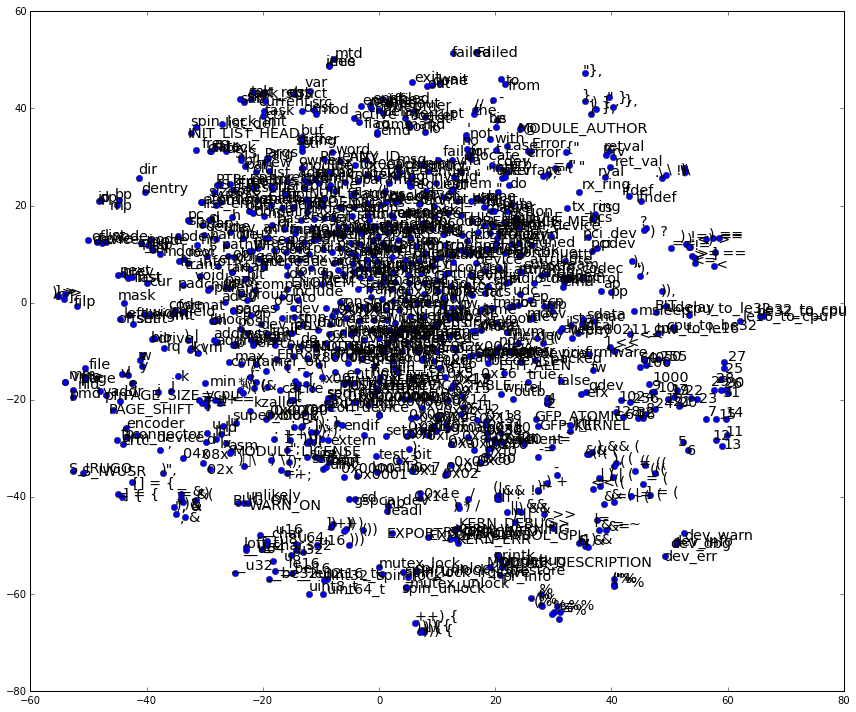

In [29]:
from mpld3 import plugins

N = 1000
fig = plt.figure(figsize=(12,10))
points = plt.plot(wvecs_tsne[:N,1], wvecs_tsne[:N,0], 'bo')
plugins.connect(fig, plugins.Zoom(enabled=True))

#labels = model.keywordList[:N]
#plugins.connect(fig, plugins.PointLabelTooltip(points[0], labels))

for i in range(N):
    plt.text(wvecs_tsne[i,1]+2*np.random.rand()-1, wvecs_tsne[i,0]+2*np.random.rand()-1, keywords[i], size='x-large')

In [12]:
def find_idx(w):
    return [i for i,x in enumerate(keywords) if w == x][0]

v1 = wvecs[find_idx('mutex_lock')]
v2 = wvecs[find_idx('mutex_unlock')]
u1 = wvecs[find_idx('spin_lock')]
u2 = wvecs[find_idx('spin_unlock')]
print (v1-v2)/(u1-u2)

[  1.24614143   0.36096609  -0.19132373  -0.94664878  -0.24735402
  -2.018399     0.80066729  -1.6745317    3.97576213  -0.59490186
   0.82985872   0.83671176   2.97966743   0.98634917   3.62440944
   0.37295008   0.0944059    5.13245058   0.76278836  -0.27584615
   3.2633462    0.83492029   1.21619761   3.25260735   0.08359827
   0.64742792   0.52521646   1.37459373  -0.76433229   0.85303223
   1.10403442   1.80307961   0.81047267   2.712955     2.98481083
   0.57908976   0.54724246  -1.67031014   2.93882656   1.59835672
   1.20333982   0.84780335   0.64561981   0.92290825  -0.57914811
   3.79585028  -0.30558926   0.111236     1.16514242   0.99166185
   1.96762693   1.28458548   1.03485668   0.70533133   0.71435618
  -1.36445689   0.89528525  -0.52734536   0.88234115   0.10217632
   1.18580902  -0.60397404   0.91566372  -1.39379585   2.99547482
  -0.04633319  -6.23008776   0.56646425   0.50082624   1.13089859
  -2.34772158  -1.51451623   1.09733129  -5.17023945   0.24384883
  -3.05584